In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def l2_norm_saldo(row):
    values = [row['Saldo_Mes_M6'], row['Saldo_Mes_M5'], row['Saldo_Mes_M4'], 
              row['Saldo_Mes_M3'], row['Saldo_Mes_M2'], row['Saldo_Mes_M1'], row['Saldo_Mes']]
    squared = [x**2 for x in values if not pd.isna(x)]
    return np.sqrt(sum(squared)) if squared else np.nan

In [7]:
def l2_norm_pago(row):
    values = [row['Pago_M6'], row['Pago_M5'], row['Pago_M4'], 
              row['Pago_M3'], row['Pago_M2'], row['Pago_M1']]
    squared = [x**2 for x in values if not pd.isna(x)]
    return np.sqrt(sum(squared)) if squared else np.nan

# Prestamo Personal

In [4]:
PP = pd.read_csv('PP.csv')

In [5]:
# PP.info()

## $L^2$ Norm

In [6]:
PP['L2_Saldo_Mes'] = PP.apply(l2_norm_saldo, axis=1)
PP['L2_Pago'] = PP.apply(l2_norm_pago, axis=1)

Hay un issue pq no todos los PP tienen saldo mes completo. Cuantos no tienen (null)?:

## Nan values

In [7]:
# Get a count of NaN values for each column
PP[['Saldo_Mes_M6', 'Saldo_Mes_M5', 'Saldo_Mes_M4', 'Saldo_Mes_M3', 'Saldo_Mes_M2', 'Saldo_Mes_M1', 'Saldo_Mes', 'L2_Saldo_Mes']].isna().sum()

Saldo_Mes_M6    46681
Saldo_Mes_M5    41985
Saldo_Mes_M4    35508
Saldo_Mes_M3    24974
Saldo_Mes_M2    14128
Saldo_Mes_M1     3115
Saldo_Mes           0
L2_Saldo_Mes        0
dtype: int64

Hay bastantes nan...

## ABC Plot

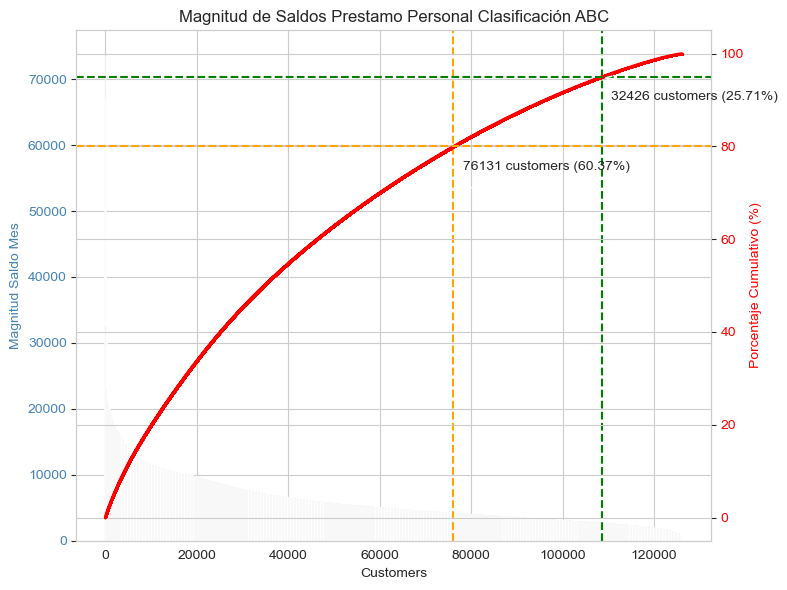

In [8]:
# Sort values in descending order
sorted_data = PP.sort_values('L2_Saldo_Mes', ascending=False).reset_index(drop=True)

# Calculate cumulative sum and percentage
sorted_data['cumsum'] = sorted_data['L2_Saldo_Mes'].cumsum()
total_sum = sorted_data['L2_Saldo_Mes'].sum()
sorted_data['cum_percentage'] = 100 * sorted_data['cumsum'] / total_sum

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

# Plot the bars
ax1.bar(sorted_data.index, sorted_data['L2_Saldo_Mes'], color='steelblue', alpha=0.7)
ax1.set_xlabel('Customers')
ax1.set_ylabel('Magnitud Saldo Mes', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Plot the cumulative percentage line
ax2.plot(sorted_data.index, sorted_data['cum_percentage'], color='red', marker='.', markersize=1, linewidth=2)
ax2.set_ylabel('Porcentaje Cumulativo (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add horizontal lines at 80% and 95%
ax2.axhline(y=80, color='orange', linestyle='--')
ax2.axhline(y=95, color='green', linestyle='--')

# Find the indices where cumulative percentage crosses 80% and 95%
idx_80 = sorted_data[sorted_data['cum_percentage'] >= 80].index[0]
idx_95 = sorted_data[sorted_data['cum_percentage'] >= 95].index[0]

# Add vertical lines at these indices
ax1.axvline(x=idx_80, color='orange', linestyle='--')
ax1.axvline(x=idx_95, color='green', linestyle='--')

# Add annotations
ax2.annotate(f'{idx_80 + 1} customers (60.37%)', 
             xy=(idx_80, 70), 
             xytext=(idx_80+2000, 75),
             arrowprops=dict(arrowstyle='->'))

ax2.annotate(f'{idx_95-idx_80 + 1} customers (25.71%)', 
             xy=(idx_95, 95), 
             xytext=(idx_95+2000, 90),
             arrowprops=dict(arrowstyle='->'))

# Set title
plt.title('Magnitud de Saldos Prestamo Personal Clasificación ABC')
plt.tight_layout()
plt.show()

## Statistics for ABC

In [9]:
# Print the cutoff information
print(f"A CLASS (80% of Debt): {idx_80+1} Clients ({(idx_80+1)/len(sorted_data)*100:.4f}% of all PP Clients)")
print(f"B CLASS (80-95% of Debt): {idx_95-idx_80 +1} Clients ({(idx_95-idx_80)/len(sorted_data)*100:.4f}% of all PP CLients)")
print(f"C CLASS (remaining 5%): {len(sorted_data)-idx_95-1} Clients ({(len(sorted_data)-idx_95-1)/len(sorted_data)*100:.4f}% of all PP Clientes)")

A CLASS (80% of Debt): 76131 Clients (60.3663% of all PP Clients)
B CLASS (80-95% of Debt): 32426 Clients (25.7107% of all PP CLients)
C CLASS (remaining 5%): 17559 Clients (13.9230% of all PP Clientes)


In [10]:
PP['L2_Saldo_Mes'].sum()

760675679.6638137

In [11]:
idx_80 = int(idx_80)
idx_95 = int(idx_95)

These are statistics for the ABC classification

In [12]:
# Calculate the sum for each percentile range
sum_A = sorted_data.iloc[:idx_80]['L2_Saldo_Mes'].sum()  # Sum for A category (0-80%)
sum_B = sorted_data.iloc[idx_80:idx_95+1]['L2_Saldo_Mes'].sum()  # Sum for B category (80-95%)
sum_C = sorted_data.iloc[idx_95+1:]['L2_Saldo_Mes'].sum()  # Sum for C category (95-100%)

mean_A = sorted_data.iloc[:idx_80]['L2_Saldo_Mes'].mean()  # Mean for A category
mean_B = sorted_data.iloc[idx_80:idx_95+1]['L2_Saldo_Mes'].mean()  # Mean for B category
mean_C = sorted_data.iloc[idx_95+1:]['L2_Saldo_Mes'].mean()  # Mean for C category

count_A = sorted_data.iloc[:idx_80]['L2_Saldo_Mes'].count()  # Count for A category
count_B = sorted_data.iloc[idx_80:idx_95+1]['L2_Saldo_Mes'].count()  # Count for B category
count_C = sorted_data.iloc[idx_95+1::]['L2_Saldo_Mes'].count()  # Count for C category

# Print the results
print(f"Sum for values <= 80th percentile: {sum_A:,.2f}, mean={mean_A:,.2f}, count={count_A:,}")
print(f"Sum for values between 80th and 95th percentile: {sum_B:,.2f}, mean={mean_B:,.2f}, count={count_B:,}")
print(f"Sum for values between 95th and 100th percentile: {sum_C:,.2f}, mean={mean_C:,.2f}, count={count_C:,}")
print(f"Total sum: {sorted_data['L2_Saldo_Mes'].sum():,.2f}")

Sum for values <= 80th percentile: 608,537,269.04, mean=7,993.40, count=76,130
Sum for values between 80th and 95th percentile: 114,106,425.12, mean=3,518.98, count=32,426
Sum for values between 95th and 100th percentile: 38,031,985.50, mean=2,165.95, count=17,559
Total sum: 760,675,679.66


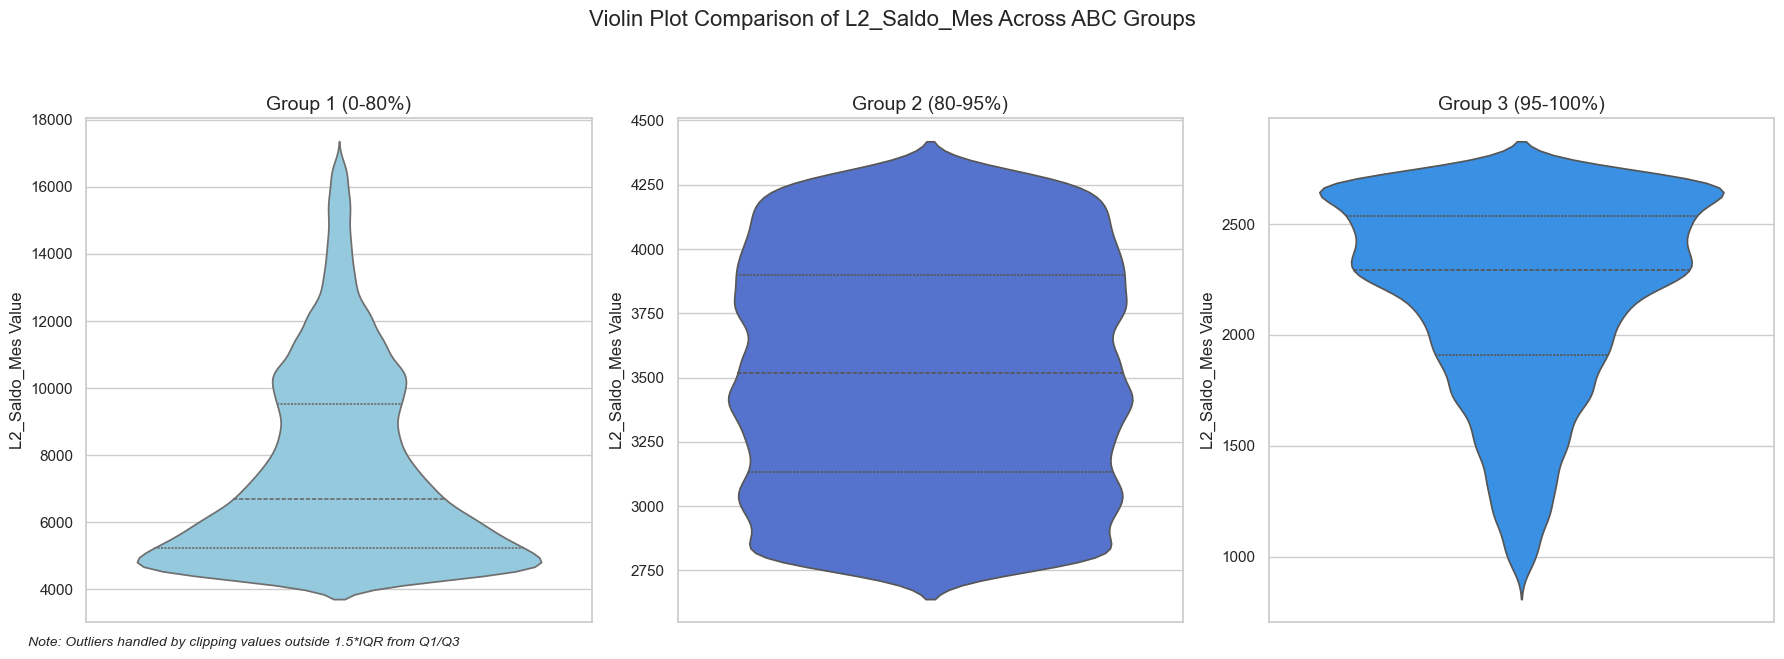

Statistics before outlier handling:
Group 1: Min=4307.28, Max=73701.09, Mean=7993.40, Median=6820.18, Std=3646.07
Group 2: Min=2749.90, Max=4307.26, Mean=3518.98, Median=3516.56, Std=445.55
Group 3: Min=0.14, Max=2749.77, Mean=2165.95, Median=2286.77, Std=461.93

Statistics after outlier handling:
Group 1: Min=4307.28, Max=16758.46, Mean=7570.49, Median=6679.84, Std=2834.86, Outliers: 2642
Group 2: Min=2749.90, Max=4307.26, Mean=3518.98, Median=3516.56, Std=445.55, Outliers: 0
Group 3: Min=932.74, Max=2749.77, Mean=2185.13, Median=2294.13, Std=433.95, Outliers: 234


In [13]:
# Assuming sorted_data, idx_80, and idx_95 are already defined
# Extract the three groups
group1 = sorted_data.iloc[:idx_80]['L2_Saldo_Mes']
group2 = sorted_data.iloc[idx_80:idx_95+1]['L2_Saldo_Mes']
group3 = sorted_data.iloc[idx_95+1:]['L2_Saldo_Mes']

# Function to handle outliers using IQR method
def handle_outliers(data):
    """
    Handle outliers in the data
    
    Parameters:
    - data: pandas Series
    
    Returns:
    - Processed data without outliers
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data >= lower_bound) & (data <= upper_bound)], data[(data < lower_bound) | (data > upper_bound)].shape[0]

# Handle outliers in each group
group1_clean,g1_otl = handle_outliers(group1)
group2_clean,g2_otl = handle_outliers(group2)
group3_clean, g3_otl = handle_outliers(group3)

# Create the data for plotting in the correct format for seaborn
plot_data = []

# Add each group's cleaned data with appropriate labels
for value in group1_clean:
    plot_data.append({'Group': 'Group 1 (0-80%)', 'L2_Saldo_Mes': value})
    
for value in group2_clean:
    plot_data.append({'Group': 'Group 2 (80-95%)', 'L2_Saldo_Mes': value})
    
for value in group3_clean:
    plot_data.append({'Group': 'Group 3 (95-100%)', 'L2_Saldo_Mes': value})

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)

# Set the style
sns.set(style="whitegrid")

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create violin plot for Group 1
sns.violinplot(y='L2_Saldo_Mes', data=plot_df[plot_df['Group'] == 'Group 1 (0-80%)'], 
               ax=axes[0], color='skyblue', inner='quartile')
axes[0].set_title('Group 1 (0-80%)', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('L2_Saldo_Mes Value', fontsize=12)

# Create violin plot for Group 2
sns.violinplot(y='L2_Saldo_Mes', data=plot_df[plot_df['Group'] == 'Group 2 (80-95%)'], 
               ax=axes[1], color='royalblue', inner='quartile')
axes[1].set_title('Group 2 (80-95%)', fontsize=14)
axes[1].set_xlabel('')
axes[1].set_ylabel('L2_Saldo_Mes Value', fontsize=12)

# Create violin plot for Group 3
sns.violinplot(y='L2_Saldo_Mes', data=plot_df[plot_df['Group'] == 'Group 3 (95-100%)'], 
               ax=axes[2], color='dodgerblue', inner='quartile')
axes[2].set_title('Group 3 (95-100%)', fontsize=14)
axes[2].set_xlabel('')
axes[2].set_ylabel('L2_Saldo_Mes Value', fontsize=12)

# Add subtitle with outlier information
plt.figtext(0.02, -0.01, 'Note: Outliers handled by clipping values outside 1.5*IQR from Q1/Q3', 
            ha='left', fontsize=10, style='italic')

# Add a main title
plt.suptitle('Violin Plot Comparison of L2_Saldo_Mes Across ABC Groups', fontsize=16, y=1.05)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Print statistics before and after outlier handling
print("Statistics before outlier handling:")
print(f"Group 1: Min={group1.min():.2f}, Max={group1.max():.2f}, "
      f"Mean={group1.mean():.2f}, Median={group1.median():.2f}, Std={group1.std():.2f}")
print(f"Group 2: Min={group2.min():.2f}, Max={group2.max():.2f}, "
      f"Mean={group2.mean():.2f}, Median={group2.median():.2f}, Std={group2.std():.2f}")
print(f"Group 3: Min={group3.min():.2f}, Max={group3.max():.2f}, "
      f"Mean={group3.mean():.2f}, Median={group3.median():.2f}, Std={group3.std():.2f}")

print("\nStatistics after outlier handling:")
print(f"Group 1: Min={group1_clean.min():.2f}, Max={group1_clean.max():.2f}, "
      f"Mean={group1_clean.mean():.2f}, Median={group1_clean.median():.2f}, Std={group1_clean.std():.2f}"
      f", Outliers: {g1_otl}")
print(f"Group 2: Min={group2_clean.min():.2f}, Max={group2_clean.max():.2f}, "
      f"Mean={group2_clean.mean():.2f}, Median={group2_clean.median():.2f}, Std={group2_clean.std():.2f}"
      f", Outliers: {g2_otl}")
print(f"Group 3: Min={group3_clean.min():.2f}, Max={group3_clean.max():.2f}, "
      f"Mean={group3_clean.mean():.2f}, Median={group3_clean.median():.2f}, Std={group3_clean.std():.2f}"
      f", Outliers: {g3_otl}")

## Export Prestamo Personal

In [14]:
export_df_pp = sorted_data.drop(['cumsum', 'cum_percentage', 'Producto'], axis=1).copy()
export_df_pp['Segmento_ABC'] = pd.Series()

export_df_pp.loc[:idx_80, 'Segmento_ABC'] = 'A'
export_df_pp.loc[idx_80+1:idx_95, 'Segmento_ABC'] = 'B'
export_df_pp.loc[idx_95+1:, 'Segmento_ABC'] = 'C'

export_df_pp.to_csv('PP_Segmentado_ABC.csv', index=False)

# TDC Departamental

In [15]:
TDC_dept = pd.read_csv('TDC_dept.csv')

In [16]:
# TDC_dept.info()

## $L^2$ Norm

In [17]:
TDC_dept['L2_Saldo_Mes'] = TDC_dept.apply(l2_norm_saldo, axis=1)
TDC_dept['L2_Pago'] = TDC_dept.apply(l2_norm_pago, axis=1)

## Nan values

Como estan los nan aca?

In [18]:
TDC_dept[['Saldo_Mes_M6', 'Saldo_Mes_M5', 'Saldo_Mes_M4', 'Saldo_Mes_M3', 'Saldo_Mes_M2', 'Saldo_Mes_M1', 'Saldo_Mes', 'L2_Saldo_Mes']].isna().sum()

Saldo_Mes_M6    109294
Saldo_Mes_M5     96041
Saldo_Mes_M4     79929
Saldo_Mes_M3     55305
Saldo_Mes_M2     30787
Saldo_Mes_M1      4171
Saldo_Mes            0
L2_Saldo_Mes         0
dtype: int64

## ABC Plot

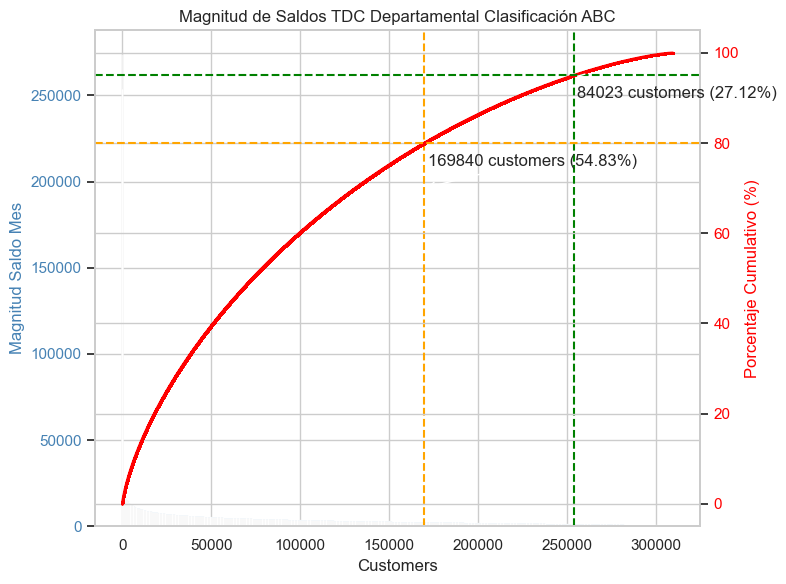

In [19]:
# Sort values in descending order
sorted_data = TDC_dept.sort_values('L2_Saldo_Mes', ascending=False).reset_index(drop=True)

# Calculate cumulative sum and percentage
sorted_data['cumsum'] = sorted_data['L2_Saldo_Mes'].cumsum()
total_sum = sorted_data['L2_Saldo_Mes'].sum()
sorted_data['cum_percentage'] = 100 * sorted_data['cumsum'] / total_sum

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

# Plot the bars
ax1.bar(sorted_data.index, sorted_data['L2_Saldo_Mes'], color='steelblue', alpha=0.7)
ax1.set_xlabel('Customers')
ax1.set_ylabel('Magnitud Saldo Mes', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Plot the cumulative percentage line
ax2.plot(sorted_data.index, sorted_data['cum_percentage'], color='red', marker='.', markersize=1, linewidth=2)
ax2.set_ylabel('Porcentaje Cumulativo (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add horizontal lines at 80% and 95%
ax2.axhline(y=80, color='orange', linestyle='--')
ax2.axhline(y=95, color='green', linestyle='--')

# Find the indices where cumulative percentage crosses 80% and 95%
idx_80 = sorted_data[sorted_data['cum_percentage'] >= 80].index[0]
idx_95 = sorted_data[sorted_data['cum_percentage'] >= 95].index[0]

# Add vertical lines at these indices
ax1.axvline(x=idx_80, color='orange', linestyle='--')
ax1.axvline(x=idx_95, color='green', linestyle='--')

# Add annotations
ax2.annotate(f'{idx_80 + 1} customers (54.83%)', 
             xy=(idx_80, 70), 
             xytext=(idx_80+2000, 75),
             arrowprops=dict(arrowstyle='->'))

ax2.annotate(f'{idx_95-idx_80 + 1} customers (27.12%)', 
             xy=(idx_95, 95), 
             xytext=(idx_95+2000, 90),
             arrowprops=dict(arrowstyle='->'))

# Set title
plt.title('Magnitud de Saldos TDC Departamental Clasificación ABC')
plt.tight_layout()
plt.show()

## Statistics for ABC

In [20]:
# Print the cutoff information
print(f"A CLASS (80% of Debt): {idx_80+1} Clients ({(idx_80+1)/len(sorted_data)*100:.4f}% of all TDC Dept Clients)")
print(f"B CLASS (80-95% of Debt): {idx_95-idx_80} Clients ({(idx_95-idx_80)/len(sorted_data)*100:.4f}% of all TDC Dept CLients)")
print(f"C CLASS (remaining 5%): {len(sorted_data)-idx_95-1} Clients ({(len(sorted_data)-idx_95-1)/len(sorted_data)*100:.4f}% of all TDC Dept Clientes)")

A CLASS (80% of Debt): 169840 Clients (54.8283% of all TDC Dept Clients)
B CLASS (80-95% of Debt): 84022 Clients (27.1243% of all TDC Dept CLients)
C CLASS (remaining 5%): 55905 Clients (18.0474% of all TDC Dept Clientes)


In [21]:
TDC_dept['L2_Saldo_Mes'].sum()

1081555344.1219707

In [22]:
idx_80 = int(idx_80)
idx_95 = int(idx_95)

In [23]:
# Calculate the sum for each percentile range
sum_A = sorted_data.iloc[:idx_80]['L2_Saldo_Mes'].sum()  # Sum for A category (0-80%)
sum_B = sorted_data.iloc[idx_80:idx_95+1]['L2_Saldo_Mes'].sum()  # Sum for B category (80-95%)
sum_C = sorted_data.iloc[idx_95+1:]['L2_Saldo_Mes'].sum()  # Sum for C category (95-100%)

mean_A = sorted_data.iloc[:idx_80]['L2_Saldo_Mes'].mean()  # Mean for A category
mean_B = sorted_data.iloc[idx_80:idx_95+1]['L2_Saldo_Mes'].mean()  # Mean for B category
mean_C = sorted_data.iloc[idx_95+1:]['L2_Saldo_Mes'].mean()  # Mean for C category

count_A = sorted_data.iloc[:idx_80]['L2_Saldo_Mes'].count()  # Count for A category
count_B = sorted_data.iloc[idx_80:idx_95+1]['L2_Saldo_Mes'].count()  # Count for B category
count_C = sorted_data.iloc[idx_95+1:]['L2_Saldo_Mes'].count()  # Count for C category

# Print the results
print(f"Sum for values <= 80th percentile: {sum_A:,.2f}, mean={mean_A:,.2f}, count={count_A:,}")
print(f"Sum for values between 80th and 95th percentile: {sum_B:,.2f}, mean={mean_B:,.2f}, count={count_B:,}")
print(f"Sum for values between 95th and 100th percentile: {sum_C:,.2f}, mean={mean_C:,.2f}, count={count_C:,}")
print(f"Total sum: {sorted_data['L2_Saldo_Mes'].sum():,.2f}")

Sum for values <= 80th percentile: 865,243,039.16, mean=5,094.49, count=169,839
Sum for values between 80th and 95th percentile: 162,234,736.01, mean=1,930.84, count=84,023
Sum for values between 95th and 100th percentile: 54,077,568.95, mean=967.31, count=55,905
Total sum: 1,081,555,344.12


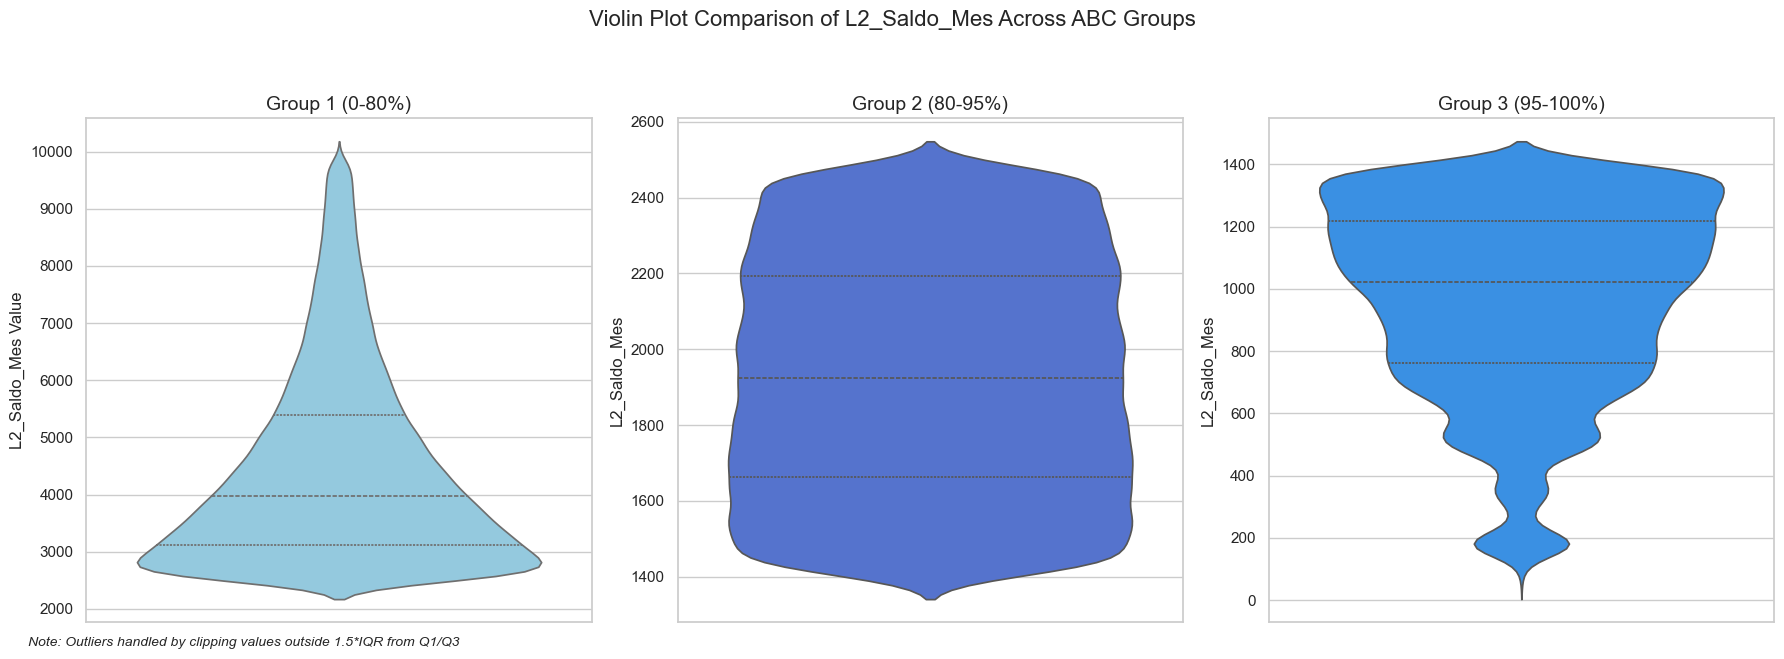

Statistics before outlier handling:
Group 1: Min=2484.34, Max=274041.34, Mean=5094.49, Median=4133.11, Std=3388.52
Group 2: Min=1404.89, Max=2484.32, Mean=1930.84, Median=1924.69, Std=308.44
Group 3: Min=0.32, Max=1404.88, Mean=967.31, Median=1020.27, Std=307.79

Statistics after outlier handling:
Group 1: Min=2484.34, Max=9868.30, Mean=4479.40, Median=3983.76, Std=1713.22, Outliers: 11061
Group 2: Min=1404.89, Max=2484.32, Mean=1930.84, Median=1924.69, Std=308.44, Outliers: 0
Group 3: Min=72.20, Max=1404.88, Mean=967.86, Median=1020.55, Std=307.05, Outliers: 33


In [24]:
# Assuming sorted_data, idx_80, and idx_95 are already defined
# Extract the three groups
group1 = sorted_data.iloc[:idx_80]['L2_Saldo_Mes']
group2 = sorted_data.iloc[idx_80:idx_95+1]['L2_Saldo_Mes']
group3 = sorted_data.iloc[idx_95+1:]['L2_Saldo_Mes']

# Handle outliers in each group
group1_clean,g1_otl = handle_outliers(group1)
group2_clean,g2_otl = handle_outliers(group2)
group3_clean, g3_otl = handle_outliers(group3)

# Create the data for plotting in the correct format for seaborn
plot_data = []

# Add each group's cleaned data with appropriate labels
for value in group1_clean:
    plot_data.append({'Group': 'Group 1 (0-80%)', 'L2_Saldo_Mes': value})
    
for value in group2_clean:
    plot_data.append({'Group': 'Group 2 (80-95%)', 'L2_Saldo_Mes': value})
    
for value in group3_clean:
    plot_data.append({'Group': 'Group 3 (95-100%)', 'L2_Saldo_Mes': value})

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)

# Set the style
sns.set(style="whitegrid")

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create violin plot for Group 1
sns.violinplot(y='L2_Saldo_Mes', data=plot_df[plot_df['Group'] == 'Group 1 (0-80%)'], 
               ax=axes[0], color='skyblue', inner='quartile')
axes[0].set_title('Group 1 (0-80%)', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('L2_Saldo_Mes Value', fontsize=12)

# Create violin plot for Group 2
sns.violinplot(y='L2_Saldo_Mes', data=plot_df[plot_df['Group'] == 'Group 2 (80-95%)'], 
               ax=axes[1], color='royalblue', inner='quartile')
axes[1].set_title('Group 2 (80-95%)', fontsize=14)
axes[1].set_xlabel('')
axes[0].set_ylabel('L2_Saldo_Mes Value', fontsize=12)

# Create violin plot for Group 3
sns.violinplot(y='L2_Saldo_Mes', data=plot_df[plot_df['Group'] == 'Group 3 (95-100%)'], 
               ax=axes[2], color='dodgerblue', inner='quartile')
axes[2].set_title('Group 3 (95-100%)', fontsize=14)
axes[2].set_xlabel('')
axes[0].set_ylabel('L2_Saldo_Mes Value', fontsize=12)

# Add subtitle with outlier information
plt.figtext(0.02, -0.01, 'Note: Outliers handled by clipping values outside 1.5*IQR from Q1/Q3', 
            ha='left', fontsize=10, style='italic')

# Add a main title
plt.suptitle('Violin Plot Comparison of L2_Saldo_Mes Across ABC Groups', fontsize=16, y=1.05)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Print statistics before and after outlier handling
print("Statistics before outlier handling:")
print(f"Group 1: Min={group1.min():.2f}, Max={group1.max():.2f}, "
      f"Mean={group1.mean():.2f}, Median={group1.median():.2f}, Std={group1.std():.2f}")
print(f"Group 2: Min={group2.min():.2f}, Max={group2.max():.2f}, "
      f"Mean={group2.mean():.2f}, Median={group2.median():.2f}, Std={group2.std():.2f}")
print(f"Group 3: Min={group3.min():.2f}, Max={group3.max():.2f}, "
      f"Mean={group3.mean():.2f}, Median={group3.median():.2f}, Std={group3.std():.2f}")

print("\nStatistics after outlier handling:")
print(f"Group 1: Min={group1_clean.min():.2f}, Max={group1_clean.max():.2f}, "
      f"Mean={group1_clean.mean():.2f}, Median={group1_clean.median():.2f}, Std={group1_clean.std():.2f}"
      f", Outliers: {g1_otl}")
print(f"Group 2: Min={group2_clean.min():.2f}, Max={group2_clean.max():.2f}, "
      f"Mean={group2_clean.mean():.2f}, Median={group2_clean.median():.2f}, Std={group2_clean.std():.2f}"
      f", Outliers: {g2_otl}")
print(f"Group 3: Min={group3_clean.min():.2f}, Max={group3_clean.max():.2f}, "
      f"Mean={group3_clean.mean():.2f}, Median={group3_clean.median():.2f}, Std={group3_clean.std():.2f}"
      f", Outliers: {g3_otl}")

## Export TDC DEPT

In [25]:
export_df_TDC_Dept = sorted_data.drop(['cumsum', 'cum_percentage', 'Producto'], axis=1).copy()
export_df_TDC_Dept['Segmento_ABC'] = pd.Series()

export_df_TDC_Dept.loc[:idx_80, 'Segmento_ABC'] = 'A'
export_df_TDC_Dept.loc[idx_80+1:idx_95, 'Segmento_ABC'] = 'B'
export_df_TDC_Dept.loc[idx_95+1:, 'Segmento_ABC'] = 'C'

export_df_TDC_Dept.to_csv('TDC_Dept_Segmentado_ABC.csv', index=False)

# TDC Visas

In [3]:
TDC_Visa = pd.read_csv('TDC_Visa.csv', low_memory=False)

## $L^2$ Norm

In [10]:
TDC_Visa['L2_Saldo_Mes'] = TDC_Visa.apply(l2_norm_saldo, axis=1)
TDC_Visa['L2_Pago'] = TDC_Visa.apply(l2_norm_pago, axis=1)

## Nan values

In [11]:
TDC_Visa[['Saldo_Mes_M6', 'Saldo_Mes_M5', 'Saldo_Mes_M4', 'Saldo_Mes_M3', 'Saldo_Mes_M2', 'Saldo_Mes_M1', 'Saldo_Mes', 'L2_Saldo_Mes']].isna().sum()

Saldo_Mes_M6    348208
Saldo_Mes_M5    295282
Saldo_Mes_M4    230461
Saldo_Mes_M3    145566
Saldo_Mes_M2     71946
Saldo_Mes_M1     13220
Saldo_Mes            0
L2_Saldo_Mes         0
dtype: int64

## ABC Plot

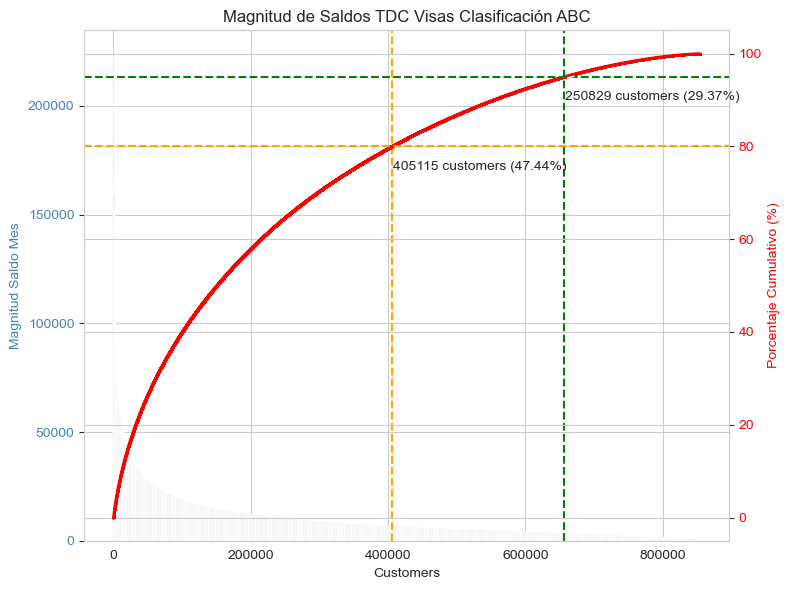

In [13]:
# Sort values in descending order
sorted_data = TDC_Visa.sort_values('L2_Saldo_Mes', ascending=False).reset_index(drop=True)

# Calculate cumulative sum and percentage
sorted_data['cumsum'] = sorted_data['L2_Saldo_Mes'].cumsum()
total_sum = sorted_data['L2_Saldo_Mes'].sum()
sorted_data['cum_percentage'] = 100 * sorted_data['cumsum'] / total_sum

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

# Plot the bars
ax1.bar(sorted_data.index, sorted_data['L2_Saldo_Mes'], color='steelblue', alpha=0.7)
ax1.set_xlabel('Customers')
ax1.set_ylabel('Magnitud Saldo Mes', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Plot the cumulative percentage line
ax2.plot(sorted_data.index, sorted_data['cum_percentage'], color='red', marker='.', markersize=1, linewidth=2)
ax2.set_ylabel('Porcentaje Cumulativo (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add horizontal lines at 80% and 95%
ax2.axhline(y=80, color='orange', linestyle='--')
ax2.axhline(y=95, color='green', linestyle='--')

# Find the indices where cumulative percentage crosses 80% and 95%
idx_80 = sorted_data[sorted_data['cum_percentage'] >= 80].index[0]
idx_95 = sorted_data[sorted_data['cum_percentage'] >= 95].index[0]

# Add vertical lines at these indices
ax1.axvline(x=idx_80, color='orange', linestyle='--')
ax1.axvline(x=idx_95, color='green', linestyle='--')

# Add annotations
ax2.annotate(f'{idx_80} customers (47.44%)',
             xy=(idx_80, 70), 
             xytext=(idx_80+2000, 75),
             arrowprops=dict(arrowstyle='->'))

ax2.annotate(f'{idx_95-idx_80} customers (29.37%)',
             xy=(idx_95, 95), 
             xytext=(idx_95+2000, 90),
             arrowprops=dict(arrowstyle='->'))

# Set title
plt.title('Magnitud de Saldos TDC Visas Clasificación ABC')
plt.tight_layout()
plt.show()

## Statistics for ABC

In [30]:
# Print the cutoff information
print(f"A CLASS (80% of Debt): {idx_80+1} Clients ({(idx_80+1)/len(sorted_data)*100:.4f}% of all TDC Dept Clients)")
print(f"B CLASS (80-95% of Debt): {idx_95-idx_80} Clients ({(idx_95-idx_80)/len(sorted_data)*100:.4f}% of all TDC Dept CLients)")
print(f"C CLASS (remaining 5%): {len(sorted_data)-idx_95-1} Clients ({(len(sorted_data)-idx_95-1)/len(sorted_data)*100:.4f}% of all TDC Dept Clientes)")

A CLASS (80% of Debt): 405116 Clients (47.4375% of all TDC Dept Clients)
B CLASS (80-95% of Debt): 250829 Clients (29.3711% of all TDC Dept CLients)
C CLASS (remaining 5%): 198054 Clients (23.1914% of all TDC Dept Clientes)


In [31]:
TDC_Visa['L2_Saldo_Mes'].sum()

8358490945.752844

In [32]:
idx_80 = int(idx_80)
idx_95 = int(idx_95)

In [33]:
# Calculate the sum for each percentile range
sum_A = sorted_data.iloc[:idx_80]['L2_Saldo_Mes'].sum()  # Sum for A category (0-80%)
sum_B = sorted_data.iloc[idx_80:idx_95+1]['L2_Saldo_Mes'].sum()  # Sum for B category (80-95%)
sum_C = sorted_data.iloc[idx_95+1:]['L2_Saldo_Mes'].sum()  # Sum for C category (95-100%)

mean_A = sorted_data.iloc[:idx_80]['L2_Saldo_Mes'].mean()  # Mean for A category
mean_B = sorted_data.iloc[idx_80:idx_95+1]['L2_Saldo_Mes'].mean()  # Mean for B category
mean_C = sorted_data.iloc[idx_95+1:]['L2_Saldo_Mes'].mean()  # Mean for C category

count_A = sorted_data.iloc[:idx_80]['L2_Saldo_Mes'].count()  # Count for A category
count_B = sorted_data.iloc[idx_80:idx_95+1]['L2_Saldo_Mes'].count()  # Count for B category
count_C = sorted_data.iloc[idx_95+1:]['L2_Saldo_Mes'].count()  # Count for C category

# Print the results
print(f"Sum for values <= 80th percentile: {sum_A:,.2f}, mean={mean_A:,.2f}, count={count_A:,}")
print(f"Sum for values between 80th and 95th percentile: {sum_B:,.2f}, mean={mean_B:,.2f}, count={count_B:,}")
print(f"Sum for values between 95th and 100th percentile: {sum_C:,.2f}, mean={mean_C:,.2f}, count={count_C:,}")
print(f"Total sum: {sorted_data['L2_Saldo_Mes'].sum():,.2f}")

Sum for values <= 80th percentile: 6,686,787,198.93, mean=16,505.90, count=405,115
Sum for values between 80th and 95th percentile: 1,253,781,685.05, mean=4,998.53, count=250,830
Sum for values between 95th and 100th percentile: 417,922,061.77, mean=2,110.14, count=198,054
Total sum: 8,358,490,945.75


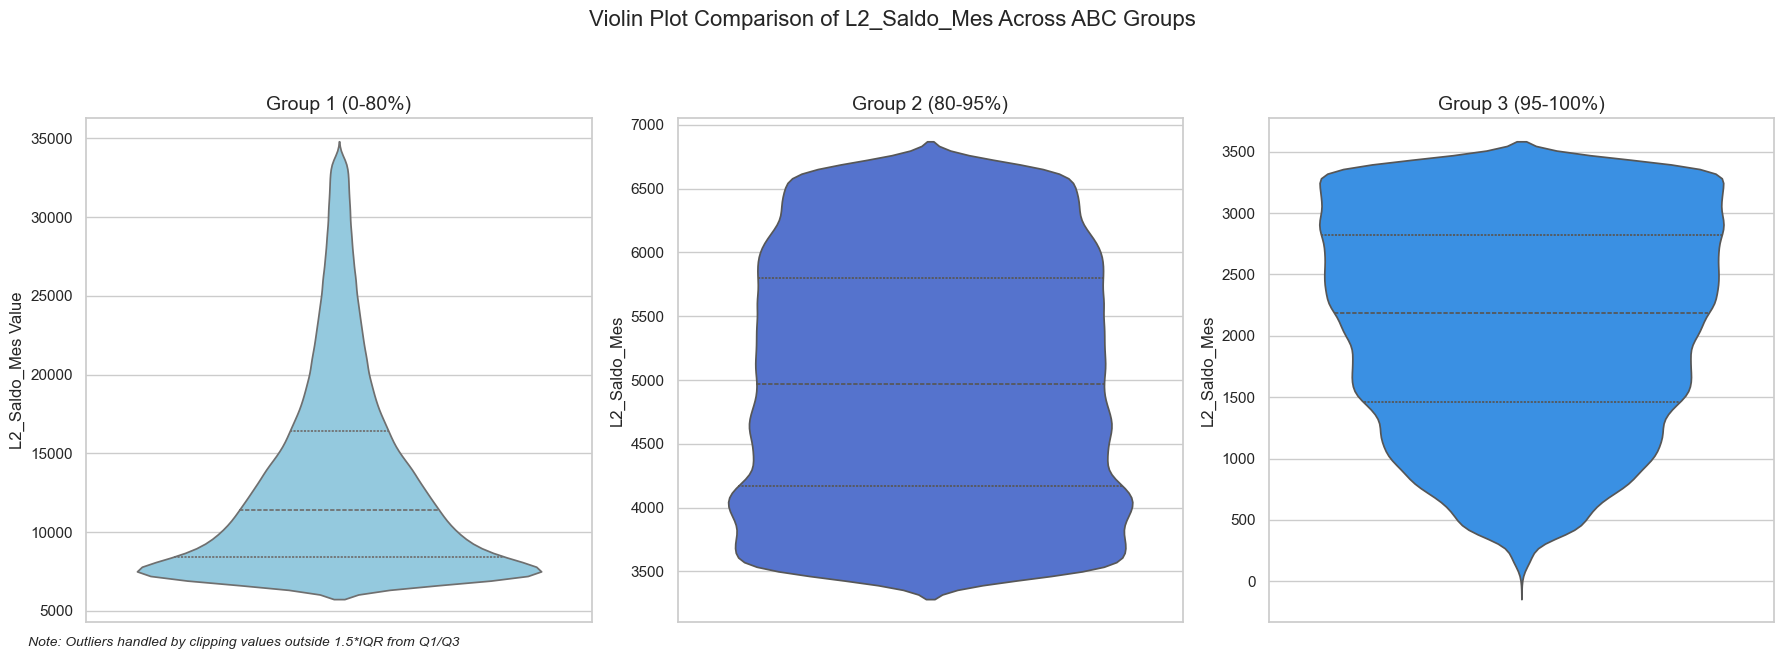

Statistics before outlier handling:
Group 1: Min=6714.50, Max=223586.54, Mean=16505.90, Median=12106.93, Std=12993.32
Group 2: Min=3439.33, Max=6714.49, Mean=4998.53, Median=4971.33, Std=936.82
Group 3: Min=0.07, Max=3439.32, Mean=2110.14, Median=2183.93, Std=832.09

Statistics after outlier handling:
Group 1: Min=6714.50, Max=33846.66, Mean=13402.66, Median=11434.83, Std=6279.28, Outliers: 32997
Group 2: Min=3439.33, Max=6714.49, Mean=4998.53, Median=4971.33, Std=936.82, Outliers: 0
Group 3: Min=0.07, Max=3439.32, Mean=2110.14, Median=2183.93, Std=832.09, Outliers: 0


In [34]:
# Assuming sorted_data, idx_80, and idx_95 are already defined
# Extract the three groups
group1 = sorted_data.iloc[:idx_80]['L2_Saldo_Mes']
group2 = sorted_data.iloc[idx_80:idx_95+1]['L2_Saldo_Mes']
group3 = sorted_data.iloc[idx_95+1:]['L2_Saldo_Mes']

# Handle outliers in each group
group1_clean,g1_otl = handle_outliers(group1)
group2_clean,g2_otl = handle_outliers(group2)
group3_clean, g3_otl = handle_outliers(group3)

# Create the data for plotting in the correct format for seaborn
plot_data = []

# Add each group's cleaned data with appropriate labels
for value in group1_clean:
    plot_data.append({'Group': 'Group 1 (0-80%)', 'L2_Saldo_Mes': value})
    
for value in group2_clean:
    plot_data.append({'Group': 'Group 2 (80-95%)', 'L2_Saldo_Mes': value})
    
for value in group3_clean:
    plot_data.append({'Group': 'Group 3 (95-100%)', 'L2_Saldo_Mes': value})

# Convert to DataFrame
plot_df = pd.DataFrame(plot_data)

# Set the style
sns.set(style="whitegrid")

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create violin plot for Group 1
sns.violinplot(y='L2_Saldo_Mes', data=plot_df[plot_df['Group'] == 'Group 1 (0-80%)'], 
               ax=axes[0], color='skyblue', inner='quartile')
axes[0].set_title('Group 1 (0-80%)', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylabel('L2_Saldo_Mes Value', fontsize=12)

# Create violin plot for Group 2
sns.violinplot(y='L2_Saldo_Mes', data=plot_df[plot_df['Group'] == 'Group 2 (80-95%)'], 
               ax=axes[1], color='royalblue', inner='quartile')
axes[1].set_title('Group 2 (80-95%)', fontsize=14)
axes[1].set_xlabel('')
axes[0].set_ylabel('L2_Saldo_Mes Value', fontsize=12)

# Create violin plot for Group 3
sns.violinplot(y='L2_Saldo_Mes', data=plot_df[plot_df['Group'] == 'Group 3 (95-100%)'], 
               ax=axes[2], color='dodgerblue', inner='quartile')
axes[2].set_title('Group 3 (95-100%)', fontsize=14)
axes[2].set_xlabel('')
axes[0].set_ylabel('L2_Saldo_Mes Value', fontsize=12)

# Add subtitle with outlier information
plt.figtext(0.02, -0.01, 'Note: Outliers handled by clipping values outside 1.5*IQR from Q1/Q3', 
            ha='left', fontsize=10, style='italic')

# Add a main title
plt.suptitle('Violin Plot Comparison of L2_Saldo_Mes Across ABC Groups', fontsize=16, y=1.05)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Optional: Print statistics before and after outlier handling
print("Statistics before outlier handling:")
print(f"Group 1: Min={group1.min():.2f}, Max={group1.max():.2f}, "
      f"Mean={group1.mean():.2f}, Median={group1.median():.2f}, Std={group1.std():.2f}")
print(f"Group 2: Min={group2.min():.2f}, Max={group2.max():.2f}, "
      f"Mean={group2.mean():.2f}, Median={group2.median():.2f}, Std={group2.std():.2f}")
print(f"Group 3: Min={group3.min():.2f}, Max={group3.max():.2f}, "
      f"Mean={group3.mean():.2f}, Median={group3.median():.2f}, Std={group3.std():.2f}")

print("\nStatistics after outlier handling:")
print(f"Group 1: Min={group1_clean.min():.2f}, Max={group1_clean.max():.2f}, "
      f"Mean={group1_clean.mean():.2f}, Median={group1_clean.median():.2f}, Std={group1_clean.std():.2f}"
      f", Outliers: {g1_otl}")
print(f"Group 2: Min={group2_clean.min():.2f}, Max={group2_clean.max():.2f}, "
      f"Mean={group2_clean.mean():.2f}, Median={group2_clean.median():.2f}, Std={group2_clean.std():.2f}"
      f", Outliers: {g2_otl}")
print(f"Group 3: Min={group3_clean.min():.2f}, Max={group3_clean.max():.2f}, "
      f"Mean={group3_clean.mean():.2f}, Median={group3_clean.median():.2f}, Std={group3_clean.std():.2f}"
      f", Outliers: {g3_otl}")

## Export TDC VISA

In [35]:
export_df_TDC_Visa = sorted_data.drop(['cumsum', 'cum_percentage', 'Producto'], axis=1 ).copy()
export_df_TDC_Visa['Segmento_ABC'] = pd.Series()

export_df_TDC_Visa.loc[:idx_80, 'Segmento_ABC'] = 'A'
export_df_TDC_Visa.loc[idx_80+1:idx_95, 'Segmento_ABC'] = 'B'
export_df_TDC_Visa.loc[idx_95+1:, 'Segmento_ABC'] = 'C'

export_df_TDC_Visa.to_csv('TDC_Visa_Segmentado_ABC.csv', index=False)

In [37]:
export_df_TDC_Visa.head(5)

,Socio,Mob,Saldo_total,Saldo_Mes,Pago_minimo_M0,Utilizacion,Pago_M0,Limite_credito,Genero,ESTADO,...,Edad,Variable_Objetivo_m6,Variable_Objetivo_m5,Variable_Objetivo_m4,Variable_Objetivo_m3,Variable_Objetivo_m2,Variable_Objetivo_m1,L2_Saldo_Mes,L2_Pago,Segmento_ABC
0,BRA,151,85488.45,85488.45,9014.00,0.949872,9050.0,90000.0,M,JAL,...,37,0,0,0,0,0,0,223586.542993,21500.000000,A
1,SUB,95,75568.64,75568.64,15869.42,1.109509,NaN,68110.0,M,TAM,...,30,0,0,0,0,0,0,166124.623360,19859.002996,A
2,SUB,97,90206.24,90206.24,90206.24,1.363662,NaN,66150.0,F,JAL,...,52,0,0,0,0,0,0,164640.000728,7522.196887,A
3,SUB,110,80815.94,80815.94,16782.37,1.221707,NaN,66150.0,F,JAL,...,67,0,0,0,0,0,0,161650.675505,14064.422811,A
4,CYA,63,72296.13,72296.13,72296.13,2.891845,NaN,25000.0,F,EM,...,50,0,0,0,0,0,0,159365.822611,9457.504956,A
